# REGULARIZATION

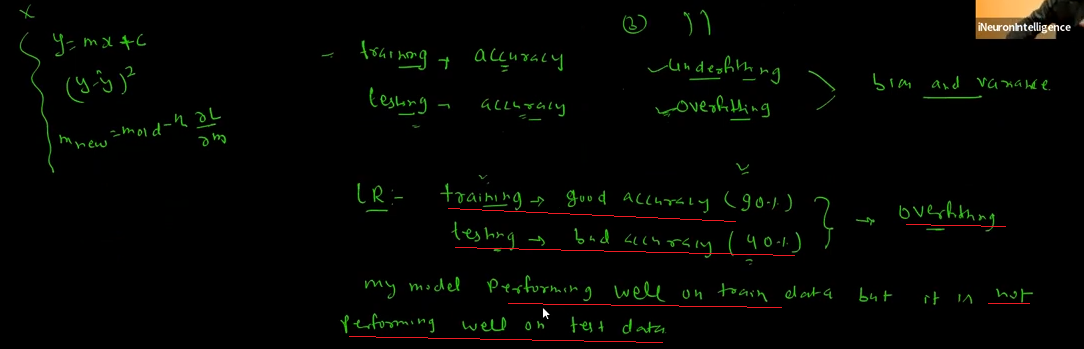

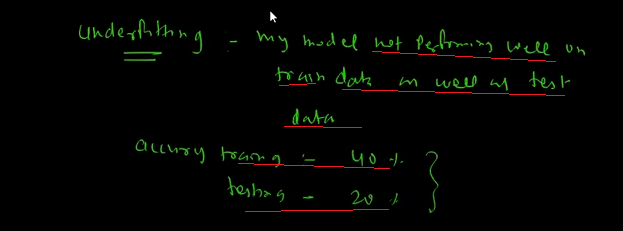

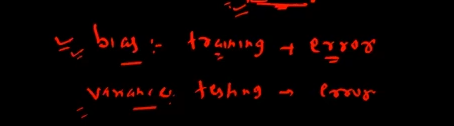

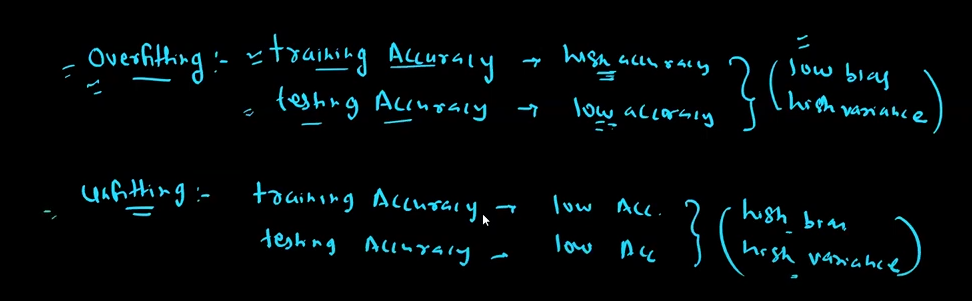

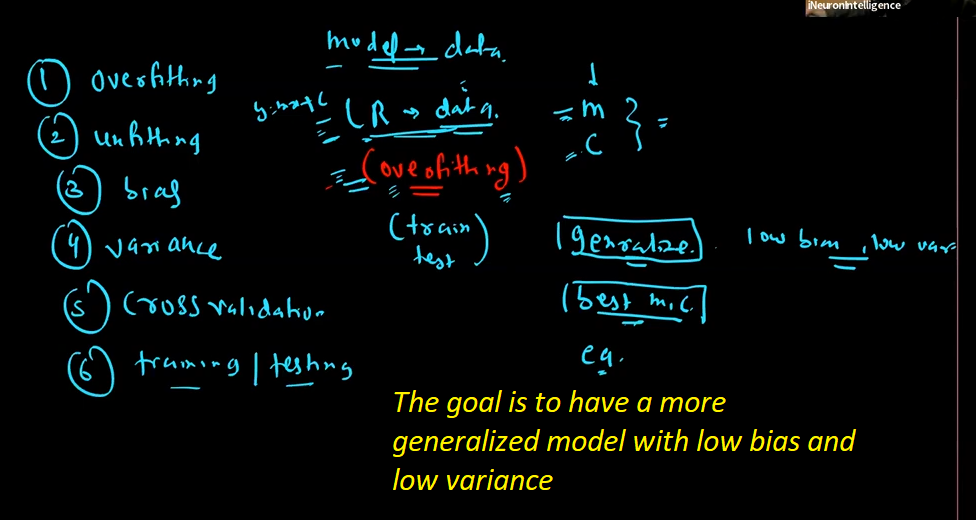

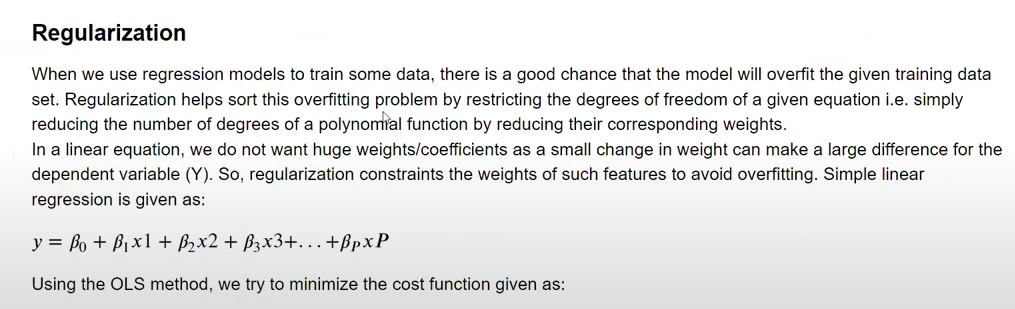

### Regularization 
When we use regression models to train some data, there is a good chance that the model will overfit the given training data set.  Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.  
In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting. Simple linear regression is given as:

$y = \beta_0 + \beta_1x1+ \beta_2x2 +\beta_3x3+...+\beta_PxP$

Using the OLS method, we try to minimize the cost function given as:

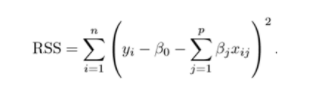

To regularize the model, a Shrinkage penalty is added to the cost function.
Let’s see different types of regularizations in regression:


#### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

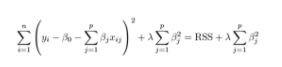

#### Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

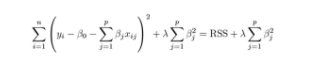

This value of lambda can be anything and should be calculated by cross validation as to what suits the model.

Let’s consider $\beta_1$ and $\beta_2$ be coefficients of a linear regression and λ = 1:

For Lasso, $\beta_1$ + $\beta_2$ <= s  

For Ridge, $\beta_1^2$ + $\beta_2^2$  <= s  

Where s is the maximum value the equations can achieve
.
If we plot both the above equations, we get the following graph:

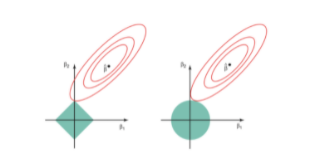

The red ellipse represents the cost function of the model, whereas the square (left side) represents the Lasso regression and the circle (right side) represents the Ridge regression.


##### Difference between Ridge and Lasso
Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn’t help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection.


##### Why use Regularization?
Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won’t fit well for dataset different that training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key.
The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.


##### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

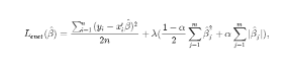

where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).

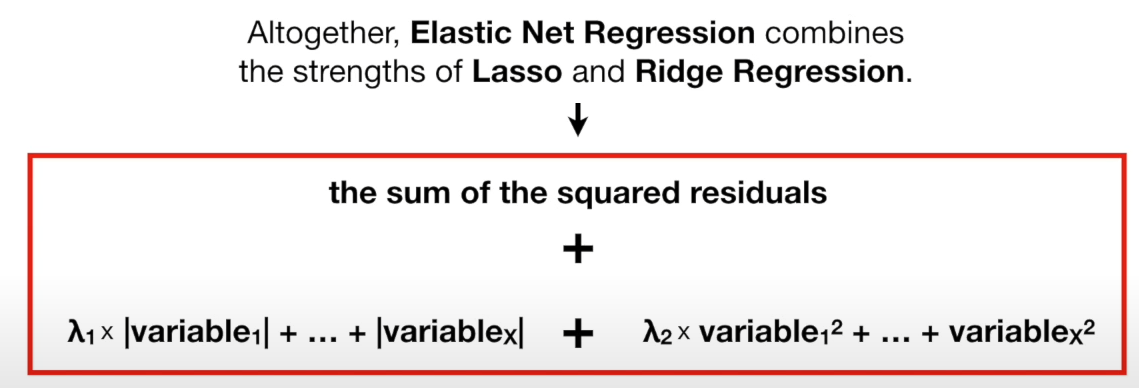

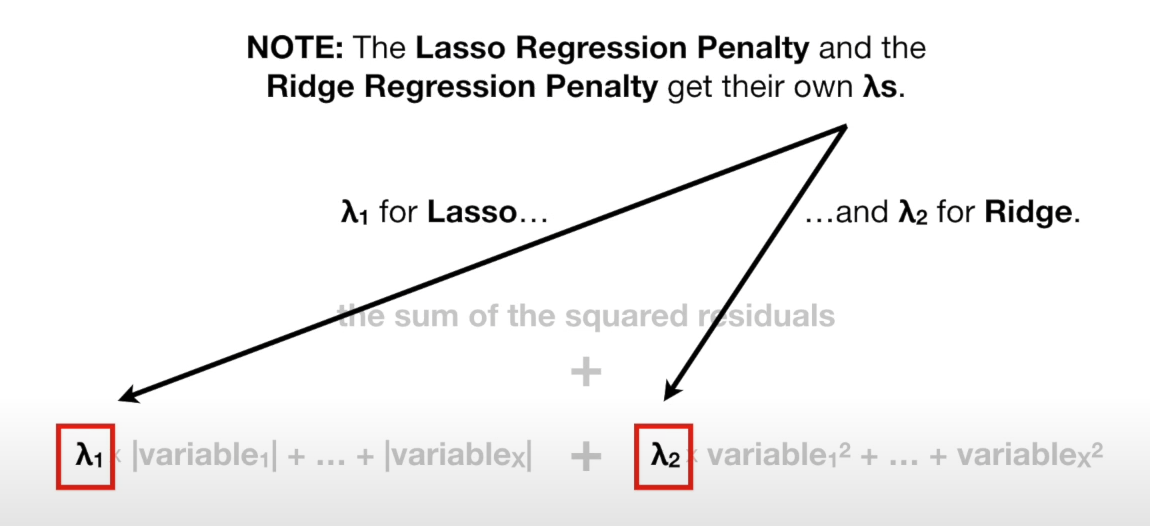

* when both lambdas are zero we get linear regression
* when lambda lasso is > 0 and lambda ridge = 0 we end up with lasso regression
* when lambda lasso is = 0 and lambda ridge > 0 we end up with ridge regression
* when both lambdas > 0 we get an hybrid elastic net regression

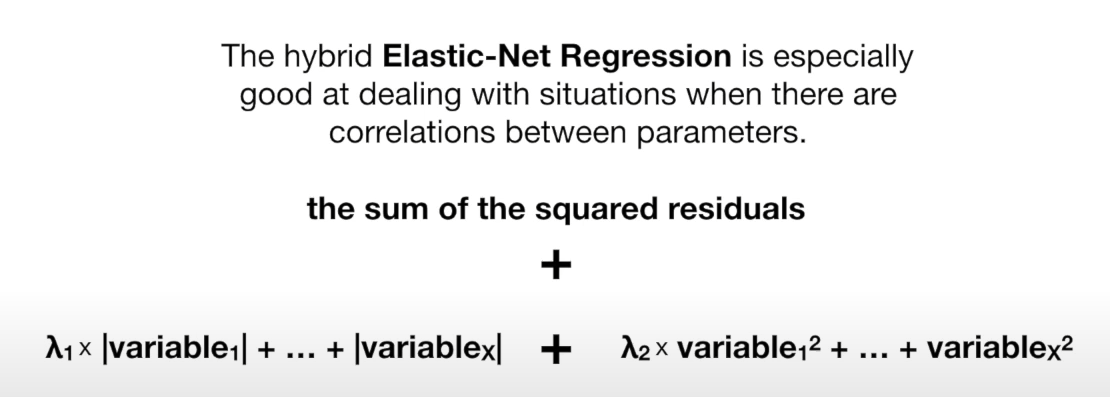

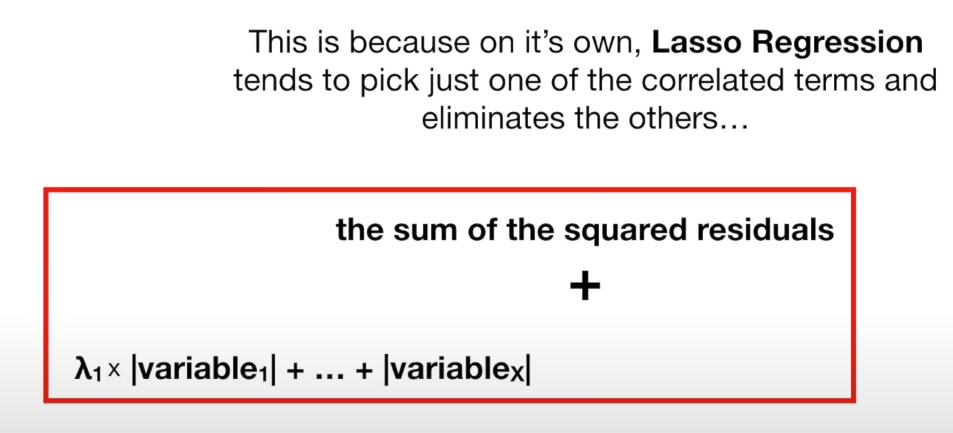

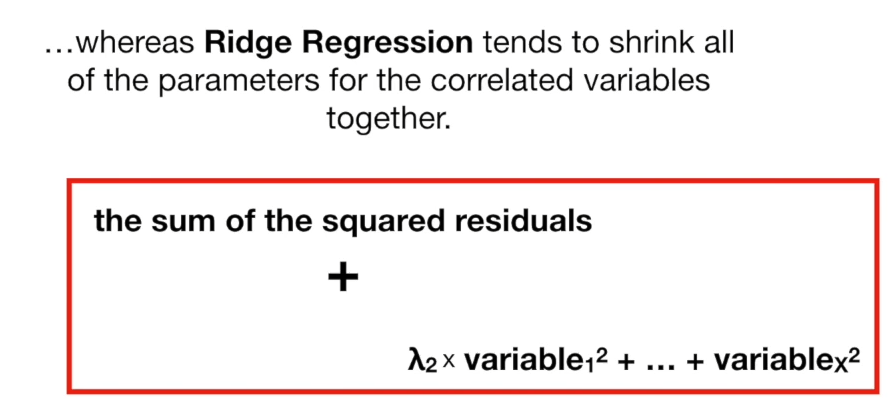

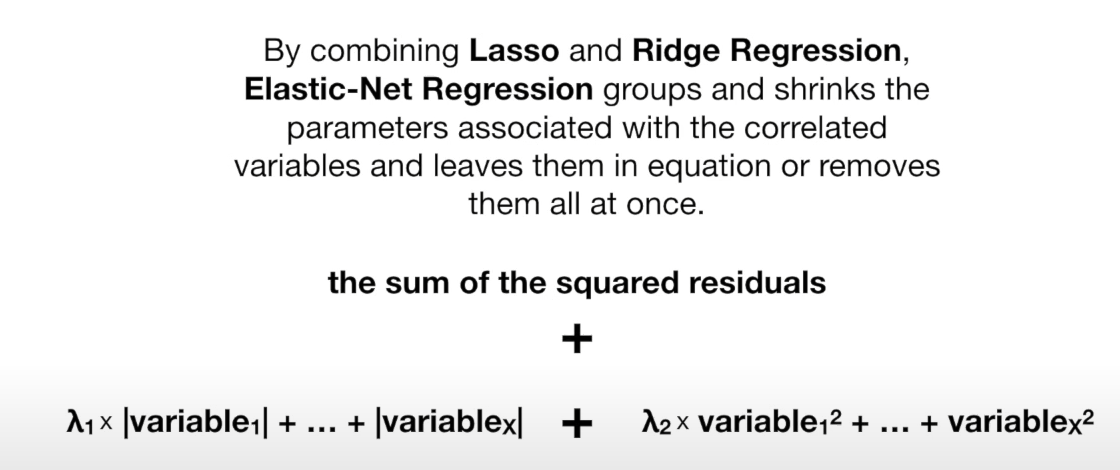

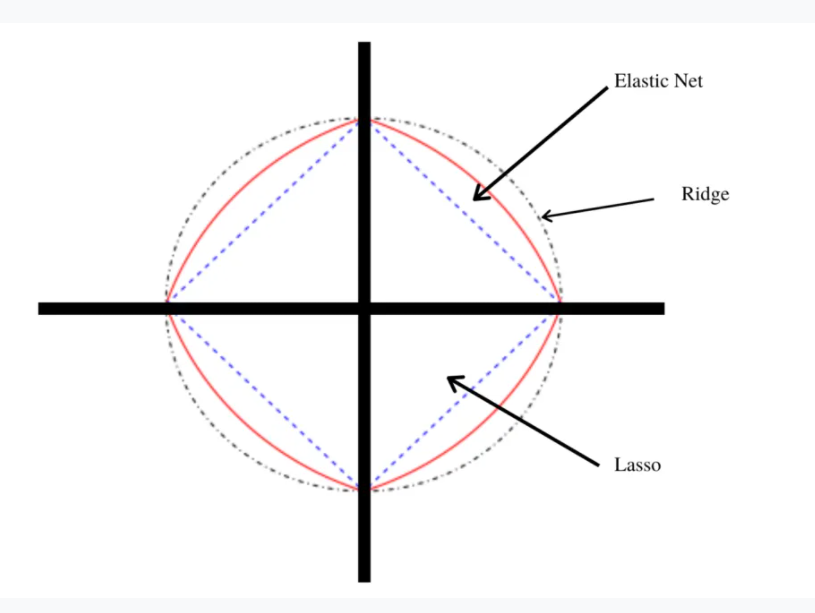

**When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?**
​
According to the Hands-on Machine Learning book, it is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.
​
No let's see the Python Implementation of these concepts:

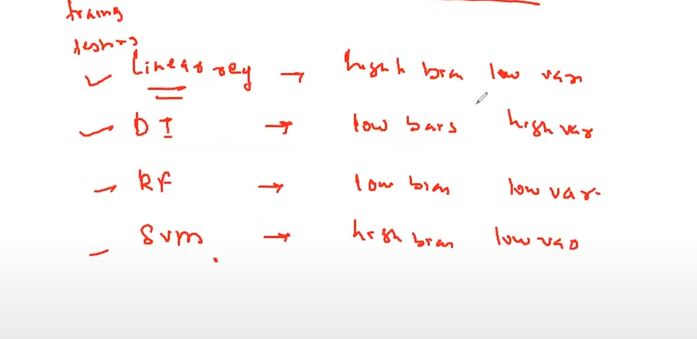

In [24]:
#Let's start with importing necessary libraries

import pandas as pd 
from pandas_profiling import ProfileReport
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-( (1-r2)*(n-1) )/(n-p-1)
    return adjusted_r2

In [4]:
data =pd.read_csv('D:\\lh_data\\ineuron\\Admission_Prediction.csv')
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   
2           3        NaN        104.0                3.0  3.0  3.5  8.00   
3           4      322.0        110.0                3.0  3.5  2.5  8.67   
4           5      314.0        103.0                2.0  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [5]:
data.describe(include="all")

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  485.000000   490.000000         485.000000  500.000000   
mean   250.500000  316.558763   107.187755           3.121649    3.374000   
std    144.481833   11.274704     6.112899           1.146160    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

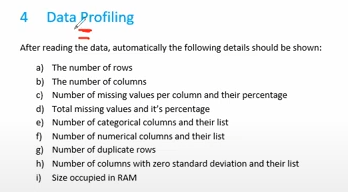

In [5]:
pf = ProfileReport(data)

In [7]:
#pf.to_widgets()
pf.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Potential multicolinearity

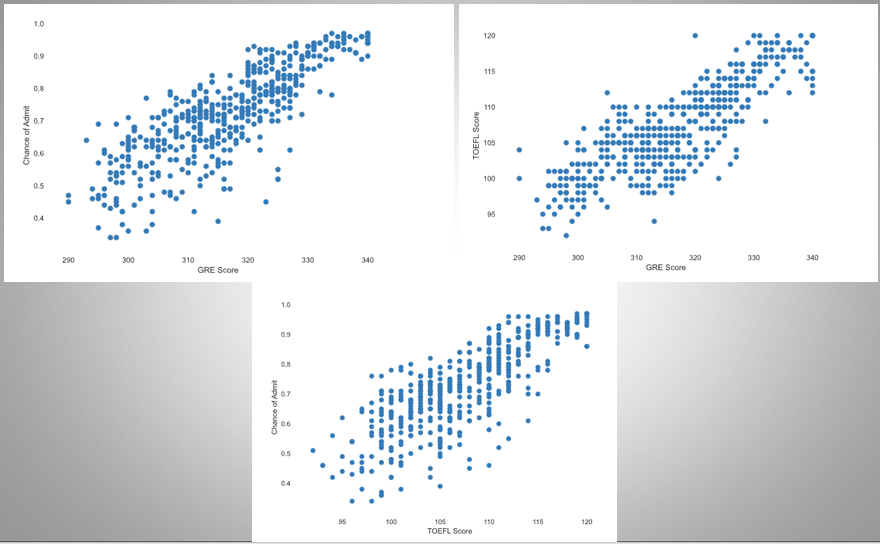

In [6]:
data.isna().sum()   # missing values per column

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [11]:
data["University Rating"].mode()[0]

3.0

* if outliers are present in the data you are better using mode rathen than mean

In [12]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [13]:
data.isna().sum()   

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
data.isnull().sum()   

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
data= data.drop(columns = ['Serial No.'])       # drop unnecessary columns
data.head()  

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0  337.000000        118.0                4.0  4.5  4.5  9.65         1   
1  324.000000        107.0                4.0  4.0  4.5  8.87         1   
2  316.558763        104.0                3.0  3.0  3.5  8.00         1   
3  322.000000        110.0                3.0  3.5  2.5  8.67         1   
4  314.000000        103.0                2.0  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

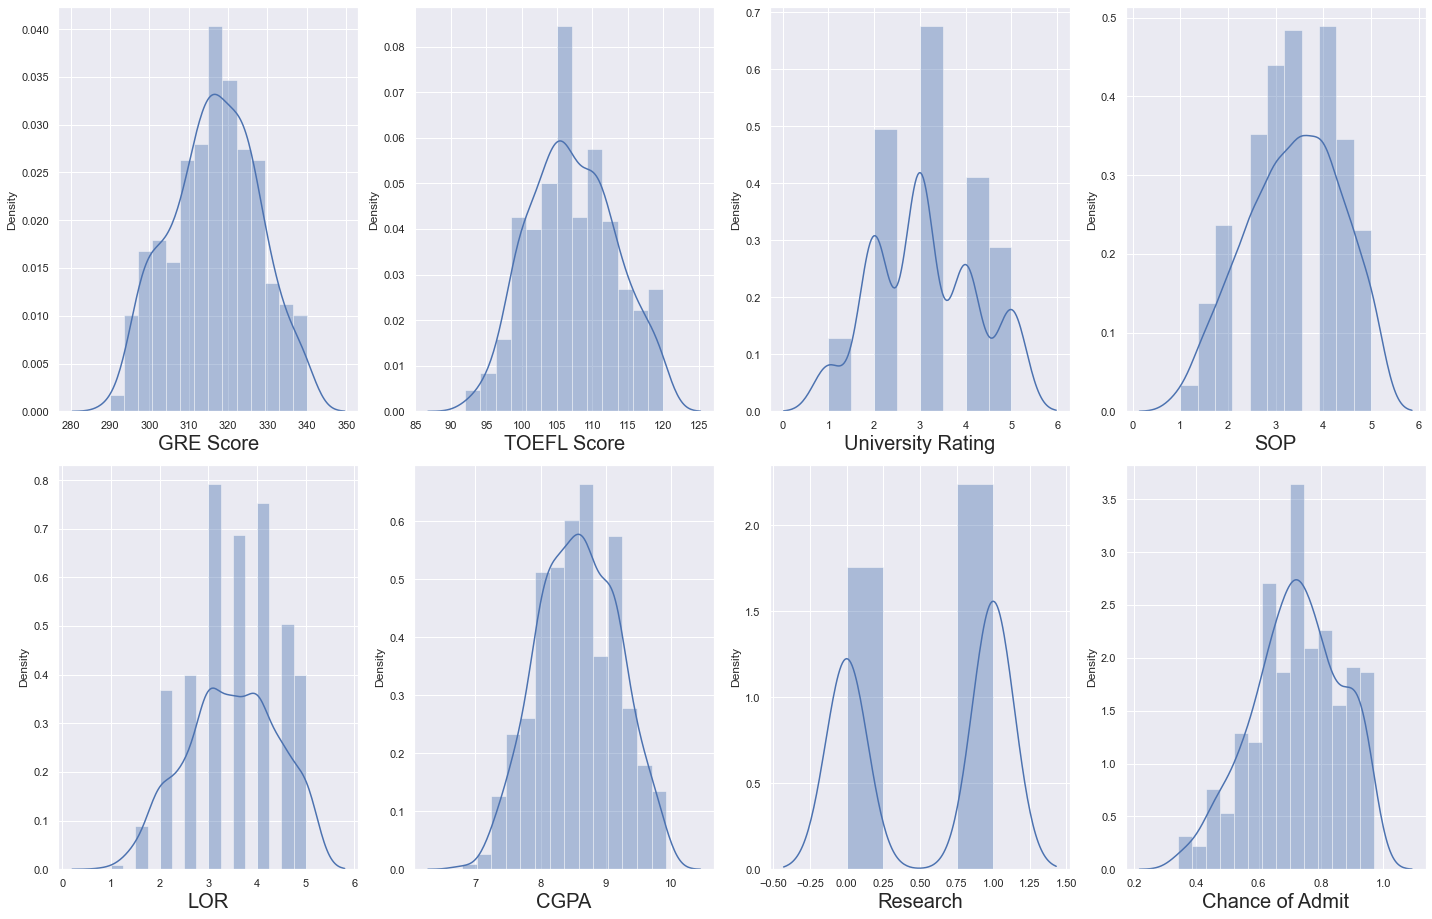

In [25]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor="white")  # opens big window with backgroun color
plotnumber=1
data_columns = data.columns

for column in data_columns:
    if plotnumber<16:
        ax = plt.subplot(4,4,plotnumber)    #creates subplots
        sns.distplot(data[column])          #creates distribution plot
        plt.xlabel(column,fontsize=20)      #plots the xlabels
    plotnumber+=1
plt.tight_layout()


* The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

* Let's observe the relationship between independent variables and dependent variable.


In [82]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

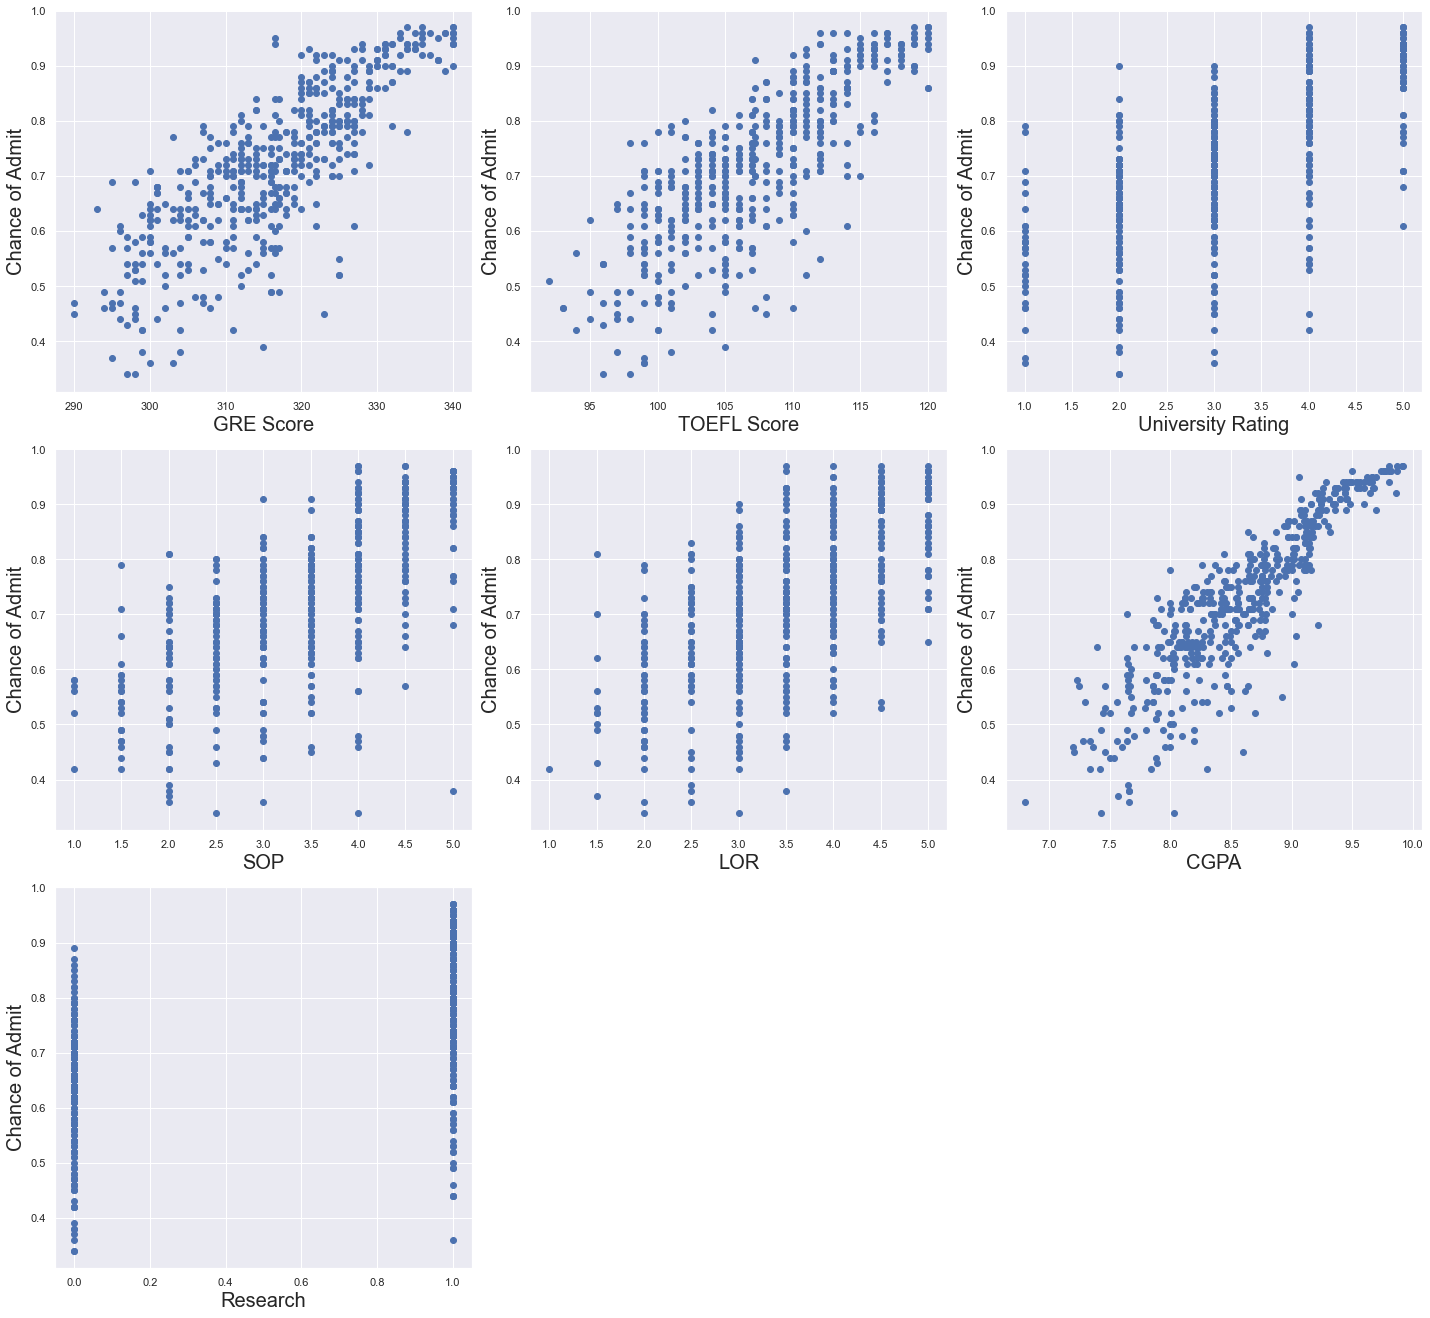

In [27]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
data_columns = X.columns

for column in data_columns:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

* Let's move ahead and check for multicollinearity.

In [28]:
X.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0  337.000000        118.0                4.0  4.5  4.5  9.65         1
1  324.000000        107.0                4.0  4.0  4.5  8.87         1
2  316.558763        104.0                3.0  3.0  3.5  8.00         1
3  322.000000        110.0                3.0  3.5  2.5  8.67         1
4  314.000000        103.0                2.0  2.0  3.0  8.21         0

In [30]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [33]:
df_X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_X_scaled

GRE Score  TOEFL Score  University Rating       SOP       LOR  \
0    1.842741e+00     1.788542           0.782010  1.137360  1.098944   
1    6.708143e-01    -0.031058           0.782010  0.632315  1.098944   
2    5.124333e-15    -0.527313          -0.104623 -0.377773  0.017306   
3    4.905178e-01     0.465197          -0.104623  0.127271 -1.064332   
4   -2.306679e-01    -0.692731          -0.991255 -1.387862 -0.523513   
..            ...          ...                ...       ...       ...   
495  1.392000e+00     0.134360           1.668642  1.137360  0.558125   
496  1.842741e+00     1.623124           1.668642  1.642404  1.639763   
497  1.211704e+00     2.119379           1.668642  1.137360  1.639763   
498 -4.109644e-01    -0.692731           0.782010  0.632315  1.639763   
499  9.412590e-01     0.961451           0.782010  1.137360  1.098944   

         CGPA  Research  
0    1.776806  0.886405  
1    0.485859  0.886405  
2   -0.954043  0.886405  
3    0.154847  0.886405  
4   -0.606480 -1.128152  
..        ...       ...  
495  0.734118  0.886405  
496  2.140919  0.886405  
497  1.627851  0.886405  
498 -0.242367 -1.128152  
499  0.767220 -1.128152  

[500 rows x 7 columns]

In [37]:
df_X_scaled.describe(include="all")  # mean=0 std=1 after standarizaation

GRE Score   TOEFL Score  University Rating           SOP  \
count  5.000000e+02  5.000000e+02       5.000000e+02  5.000000e+02   
mean   4.350520e-15  9.419132e-16       1.398881e-16  2.926548e-16   
std    1.001002e+00  1.001002e+00       1.001002e+00  1.001002e+00   
min   -2.394225e+00 -2.512331e+00      -1.877887e+00 -2.397950e+00   
25%   -6.814090e-01 -6.927310e-01      -9.912547e-01 -8.828175e-01   
50%    5.124333e-15 -3.105811e-02      -1.046226e-01  1.272712e-01   
75%    6.708143e-01  7.960330e-01       7.820095e-01  6.323155e-01   
max    2.113186e+00  2.119379e+00       1.668642e+00  1.642404e+00   

                LOR          CGPA      Research  
count  5.000000e+02  5.000000e+02  5.000000e+02  
mean  -1.332268e-17  3.091971e-15 -2.202682e-16  
std    1.001002e+00  1.001002e+00  1.001002e+00  
min   -2.686789e+00 -2.940115e+00 -1.128152e+00  
25%   -5.235128e-01 -7.430227e-01 -1.128152e+00  
50%    1.730621e-02 -2.720919e-02  8.864053e-01  
75%    5.581253e-01  7.672196e-01  8.864053e-01  
max    1.639763e+00  2.223672e+00  8.864053e-01

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled.copy()

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [40]:
vif.sort_values(by=["VIF"])   # MULTICOLINEARITY VARIES FROM 0-10, 10 BEING EXTREME, 5 BEING MODERATE

VIF           Features
6  1.459411           Research
4  2.037449                LOR
2  2.517272  University Rating
3  2.776393                SOP
1  3.793345        TOEFL Score
0  4.152735          GRE Score
5  4.654369               CGPA

* Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 


In [76]:
# data split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(375, 7) (375,) (125, 7) (125,)


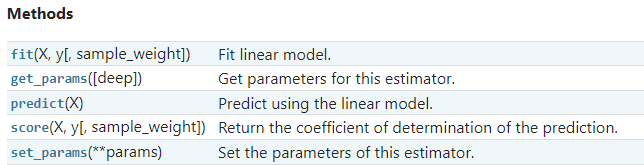

# REGRESSION

In [77]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [79]:
# saving the model to the local file system
import pickle

filename = 'LR_finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [83]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [84]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

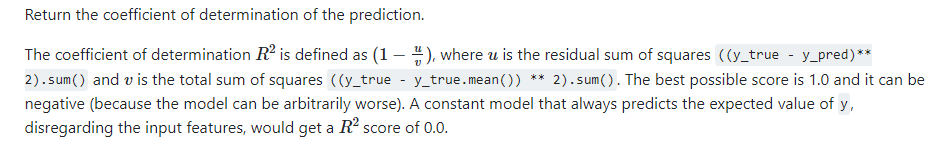

In [85]:
regression.score(x_train,y_train)   # R2 for train data

0.8415250484247909

In [86]:
adj_r2(x_train,y_train)

0.8385023654247188

* Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

* Let's check how well model fits the test data.

* Now let's check if our model is overfitting our data using regularization.

In [102]:
regression.score(x_test,y_test)   # R2 for test data

0.7534898831471067

In [103]:
adj_r2(x_test,y_test)

0.7387414146174465

* So it looks like our model $R^2$ on test data is $<$ than $R^2$ on training data.

* Let's see if our model is overfitting our training data.

# LASSO

In [104]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = False)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [105]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0005934853486378097

In [106]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)   # fit with train data

Lasso(alpha=0.0005934853486378097)

In [107]:
lasso_reg.score(x_train,y_train)   # R2 for train data

0.8414958178199806

In [108]:
lasso_reg.score(x_test, y_test)  # R2 for test data

0.7530347684111502

* our $r2_score$ for "Test data" (75.30%) came slightly lower than before using regularization (75.34%). So, it is fair to say our OLS model DID  NOT $overfit$ the data.

# RIDGE

In [110]:
alphas = np.random.uniform(low=0, high=10, size=(50,))

In [111]:
alphas

array([3.003832  , 7.1152798 , 7.97997854, 4.96371271, 3.66518843,
       1.6743453 , 5.36420514, 4.62266406, 8.42307986, 1.25711115,
       4.9082291 , 9.14859939, 3.52508732, 6.43914405, 6.60912305,
       5.93767282, 6.08025727, 8.62640589, 4.50895141, 8.45357106,
       9.55413516, 0.58699741, 1.56510439, 9.36405701, 4.46316432,
       3.79318609, 9.48965273, 6.27865147, 2.88882384, 6.91850027,
       0.76913352, 6.95539643, 2.64209243, 2.33986303, 0.61149857,
       6.92808324, 1.09952264, 6.32067505, 6.63075909, 6.78619519,
       0.31558311, 6.71712402, 6.26776893, 3.2196439 , 1.23957637,
       1.71952552, 4.96074352, 9.75806758, 7.48246751, 3.50879688])

Text(0, 0.5, 'Density')

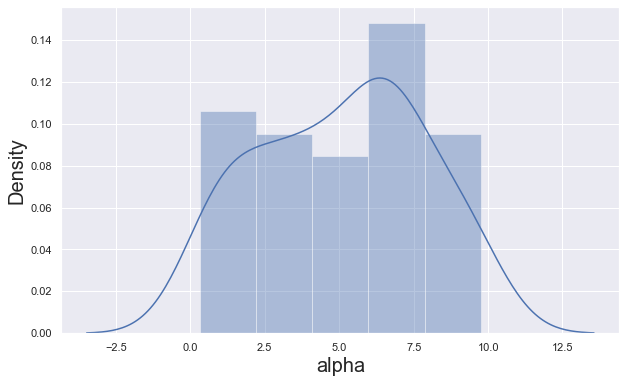

In [117]:
plt.figure(figsize=(10,6), facecolor="white")  # opens big window with backgroun color
sns.distplot(alphas)          #creates distribution plot
plt.xlabel("alpha",fontsize=20)      #plots the xlabels
plt.ylabel("Density",fontsize=20)

In [118]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([3.003832  , 7.1152798 , 7.97997854, 4.96371271, 3.66518843,
       1.6743453 , 5.36420514, 4.62266406, 8.42307986, 1.25711115,
       4.9082291 , 9.14859939, 3.52508732, 6.43914405, 6.60912305,
       5.93767282, 6.08025727, 8.62640589, 4.50895141, 8.45357106,
       9.55413516, 0.58699741, 1.56510439, 9.36405701, 4.46316432,
       3.79318609, 9.48965273, 6.27865147, 2.88882384, 6.91850027,
       0.76913352, 6.95539643, 2.64209243, 2.33986303, 0.61149857,
       6.92808324, 1.09952264, 6.32067505, 6.63075909, 6.78619519,
       0.31558311, 6.71712402, 6.26776893, 3.2196439 , 1.23957637,
       1.71952552, 4.96074352, 9.75806758, 7.48246751, 3.50879688]),
        cv=10, normalize=True)

In [119]:
ridgecv.alpha_   # best alpha

0.3155831114201202

In [120]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.3155831114201202)

In [121]:
ridge_model.score(x_train, y_train)  # R2 for train data

0.8415243133810678

In [122]:
ridge_model.score(x_test, y_test)  # R2 for test data

0.7536434729489541

* we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

# ELASTIC

In [123]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [125]:
elasticCV.alpha_  # Best alpha

0.0011069728449315508

In [126]:
# l1_ratio gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [127]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [128]:
elasticnet_reg.score(x_train, y_train)  # R2 for train data

0.8414992926261243

In [129]:
elasticnet_reg.score(x_test, y_test)  # R2 for train data

0.7531695370639867

* So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

### Polynomial Regression

For understanding Polynomial Regression, let's first understand a polynomial.
Merriam-webster defines a polynomial as:
"_A mathematical expression of one or more algebraic terms each of which consists of a constant multiplied by one or more variables raised to a non-negative integral power (such as a + bx + cx^2)"._
Simply said, poly means many. So, a polynomial is an aggregation of many monomials(or Variables).
A simple polynomial equation can be written as:
$$y = {a+bx + cx^2+...+nx^n+...}$$

So, Polynomial Regression can be defined as a mechanism to predict a _dependent variable_ based on the polynomial relationship with the _independent variable_.

 In the equation, _$$y= {a+bx + cx^2+...+nx^n+...}$$_ the maximum power of 'x' is called the degree of the polynomial equation.
 For example, if the degree is 1, the equation becomes $$y={a+bx}$$ which is a simple linear equation.
              if the degree is 2, the equation becomes $$y = {a+bx + cx^2}$$ which is a quadratic equation and so on.

## When to use Polynomial Regression?
Many times we may face a requirement where we have to do a regression, but when we plot a graph between a dependent and independent variables, the graph doesn't turn out to be a linear one.
A linear graph typically looks like:

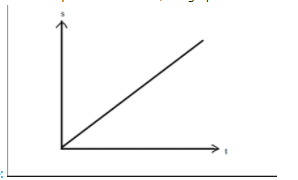

But what if the relationship looks like:

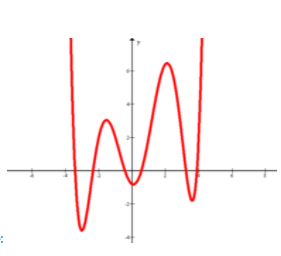

It means that the relationship between X and Y can't be described Linearly.
Then comes the time to use the Polynomial Regression.

We can generalize the matrix obtained above (for Linear Regression) for an equation of n coefficients(in y=mx+b, m and b are the coefficients) as follows: 

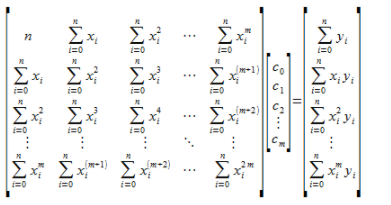

Where m is the _degree_(maximum power of x) of the polynomial and n is the number of observation points.
The above matrix results in the general formula for Polynomial Regression.
Earlier, we were able to visualize the calculation of minima because the graph was in three dimensions. But as there are n number of coefficients, it's not possible to create an (n+1)  dimension graph here. 


In [1]:
#Necessary Imports for importing the required modules to be used
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline   
# this makes sure that the graphs are printed in the jupyter notebook itself

In [2]:
#importing the dataset
dataset= pd.read_csv('D:\\lh_data\\ineuron\\Position_Salaries.csv') 
dataset.head()   # to see how the imported data looks like

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

* Here, it can be seen that there are 3 columns in the dataset. The problem statement here is to predict the salary based on the
Position and Level of the employee.
* But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model.
* Hence, Level is our feature or X variable.
And, Salary is Label or the Y variable

In [14]:
x=dataset.iloc[:,1:2].values
# x=dataset.iloc[:,1].values
print(x.shape)
x


(10, 1)


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

### this is written in this way to make x as a matrix as the machine learning algorithm. if we write 'x=dataset.iloc[:,1].values', it will return x as a single-dimensional array which is not desired 

In [11]:
#x=dataset.iloc[:,1].values
#print(x.shape)
#x

(10,)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [15]:
y=dataset.iloc[:,2].values
print(y.shape)
y

(10,)


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Generally, we divide our dataset into two parts
1) The training dataset to train our model. And,
2) The test dataset to test our prepared model.
Here, as the dataset has a limited number of entries, we won't do a split.
Instead of that, we'd use direct numerical values to test the model.
Hence, the code above is kept commented.
But, train test split can also be done, if you desire so:)
    
To learn Polynomial Regression, we'd follow a comparative approach.
First, we'll try to create a Linear Model using Linear Regression and then we'd prepare a Polynomial Regression Model and see how do they compare to each other

In [20]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

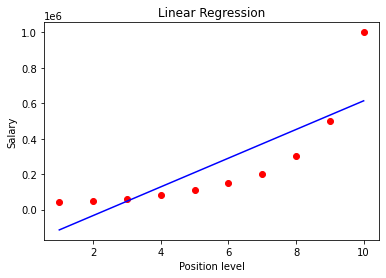

In [21]:
# Visualization
plt.scatter(x, y, color = 'red')                 # draw scatter plot of original values
plt.plot(x, lin_reg.predict(x), color = 'blue')  # draw a line
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

* Here, the red dots are the actual data points and, the blue straight line is what our model has created.
* It is evident from the diagram above that a Linear model does not fit our dataset well. So, let's try with a Polynomial Model.

In [25]:
lin_reg.score(x, y)  # R2 for train data

0.6690412331929895

In [26]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

In [27]:
#trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
poly_reg = PolynomialFeatures(degree = 2)  
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures()

In [29]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

It can be noted here that for Polynomial Regression also, we are using the Linear Regression Object.
###### Why is it so?
It is because the Linear in Linear Regression does not talk about the degree of the Polynomial equation in terms of the dependent variable(x). Instead, it talks about the degree of the coefficients. Mathematically,
$$y = {a+bx + cx^2+...+nx^n+...}$$
It's not talking about the power of x, but the powers of a,b,c etc.
And as the  coefficients are only of degree 1, hence the name Linear Regression.

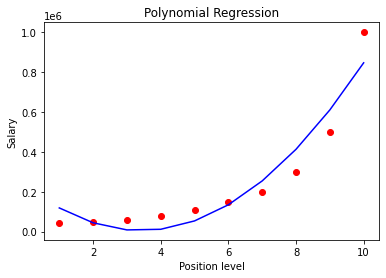

In [30]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

* Still, a two degree equation is also not a good fit. 
Now, we'll try to increase the degree of the equation i.e. we'll try to see that whether we get a good fit at a higher degree or not.
After some hit and trial, we see that the model get's the best fit for a 4th degree polynomial equation.

In [31]:
# Fitting Polynomial Regression to the dataset
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly1, y)
lin_reg_3 = LinearRegression()  
lin_reg_3.fit(X_poly1, y)       # model to use

LinearRegression()

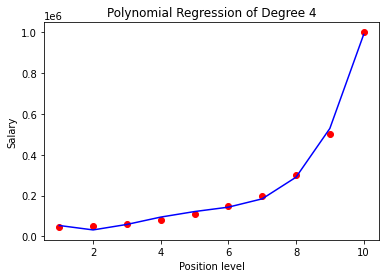

In [32]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

* Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets. we  are getting a brilliant fit as the number of datapoints are a  few.

# ASSIGNMENT
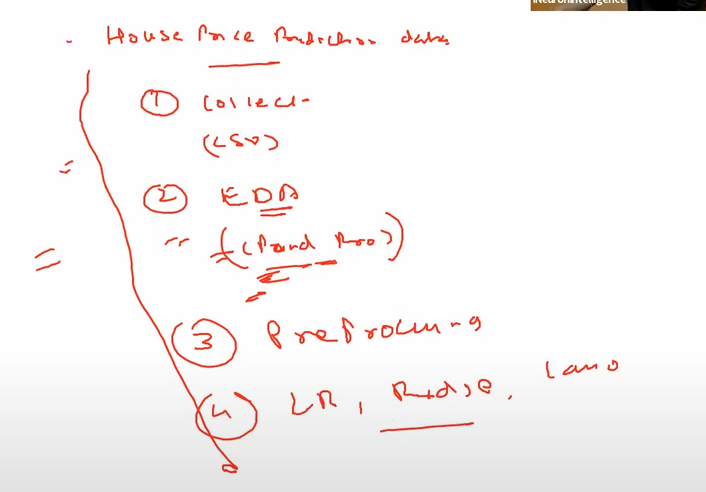